In [13]:
import numpy as np
import cv2
import mediapipe as mp
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_TESSELATION
import json
import networkx as nx
import matplotlib.pyplot as plt
import math
import scipy.sparse
import pathlib, os

In [14]:
mp_face_mes = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
face_mesh = mp_face_mes.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [15]:
def preprocess_frame(frame):
    H, W, _ = frame.shape
    rgb_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results_mesh = face_mesh.process(rgb_image)
    mesh_points=np.array([np.multiply([p.x, p.y], [W, H]).astype(int) for p in results_mesh.multi_face_landmarks[0].landmark])
    nose_tip = mesh_points[4]
    forehead = mesh_points[151]
    scale_factor = np.linalg.norm(forehead - nose_tip)
    if np.isclose(scale_factor, 0):
        scale_factor = 1e-6
    return results_mesh, mesh_points, scale_factor

In [16]:
def gera_grafos(results_mesh, mesh_points, scale_factor):
    graph = nx.Graph()
    # sabing all the nodes from mesh_points into the graph
    for i in range(len(mesh_points)):
        graph.add_node(i, pos=mesh_points[i])
    return graph

In [17]:
def plot_graph(graph, mesh_points):
    plt.figure(figsize=(10,10))
    nx.draw_networkx(graph, pos=mesh_points, node_size=10, node_color='black', edge_color='black', with_labels=False)
    # flip the image upside down
    plt.gca().invert_yaxis()
    plt.show()

In [18]:
def get_matrix_adj(graph):
    matrix_adj = nx.adjacency_matrix(graph)
    sparce_matrix = scipy.sparse.csr_matrix(matrix_adj)
    return sparce_matrix    

In [ ]:
def save_adjacency_matrix(adjacency_matrix, filename):
    path_name = pathlib.Path(filename).parent.absolute()
    emotion = path_name.name.split('_')[1]
    path_name = path_name.parent.absolute()
    path_name = path_name.joinpath(f'{emotion}_adj')
    # separate the filename from the path
    filename = pathlib.Path(filename).absolute()
    # create te folder if it doesn't exist
    path_name.mkdir(parents=True, exist_ok=True)
    # save the npz file in the path_name
    file_out = path_name.joinpath(f'{filename.name}.npz')
    scipy.sparse.save_npz(file_out, adjacency_matrix)

In [19]:
def save_meshpoints(mesh_points, filename):
    path_name = pathlib.Path(filename).parent.absolute()
    emotion = path_name.name.split('_')[1]
    path_name = path_name.parent.absolute()
    path_name = path_name.joinpath(f'{emotion}_meshpoints')
    # separete the filename from the path
    filename = pathlib.Path(filename).absolute()
    # create te folder if it doesn't exist
    path_name.mkdir(parents=True, exist_ok=True)
    # save the npz file in the path_name
    file_out = path_name.joinpath(f'{filename.name}.json')
    with open(file_out, 'w') as outfile:
        json.dump(mesh_points.tolist(), outfile)

In [20]:
def pipeline(img, plot=False):
    name = img.split('.')[0]
    frame = cv2.imread(img)
    results_mesh, mesh_points, scale_factor = preprocess_frame(frame)
    graph = gera_grafos(results_mesh, mesh_points, scale_factor)
    # adjacency_matrix = get_matrix_adj(graph)
    # save_adjacency_matrix(adjacency_matrix, name)
    save_meshpoints(mesh_points, name)
    if plot:
        plot_graph(graph, mesh_points)

## Applying the pipeline to the training set

In [21]:
# print the actual path
print(pathlib.Path().absolute())

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\GNN


In [22]:
current_path = pathlib.Path().absolute()
path = current_path.parent

angry_path = path / 'face_angry'
disgusted_path = path / 'face_disgusted'
happy_path = path / 'face_happy'
neutral_path = path / 'face_neutral'
sad_path = path / 'face_sad'
surprised_path = path / 'face_surprised'

path_list = [angry_path, disgusted_path, happy_path, neutral_path, sad_path, surprised_path]


c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry
c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\.gitkeep
'NoneType' object has no attribute 'shape'
c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\0.jpg


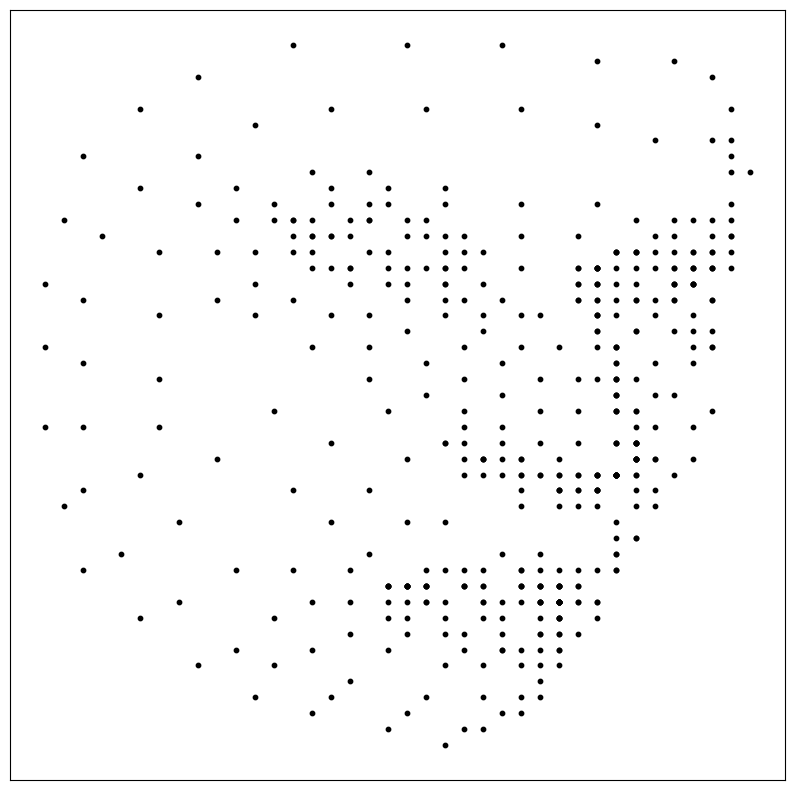

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\1.jpg


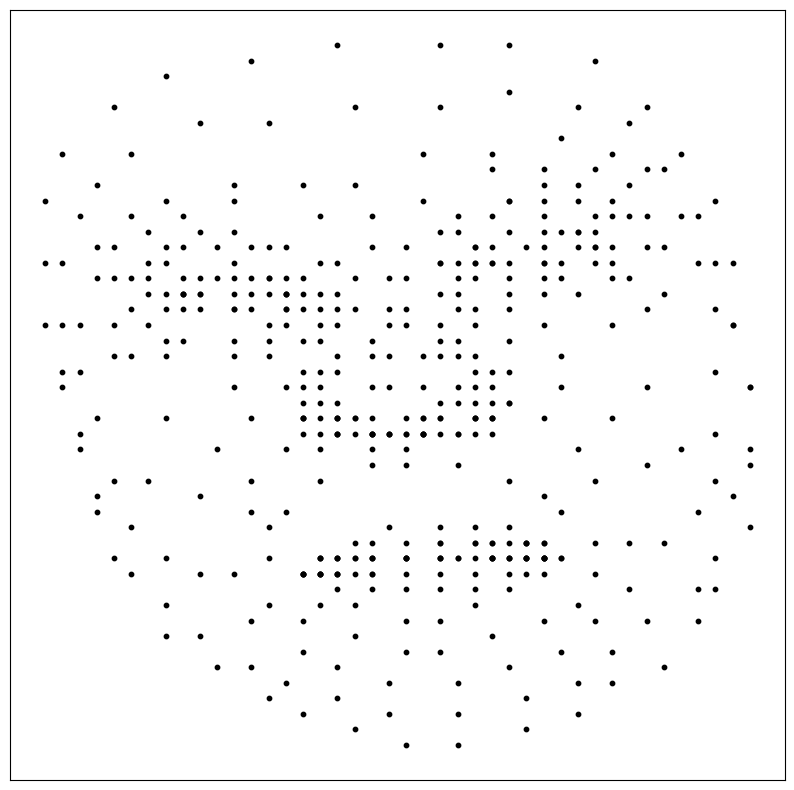

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10.jpg


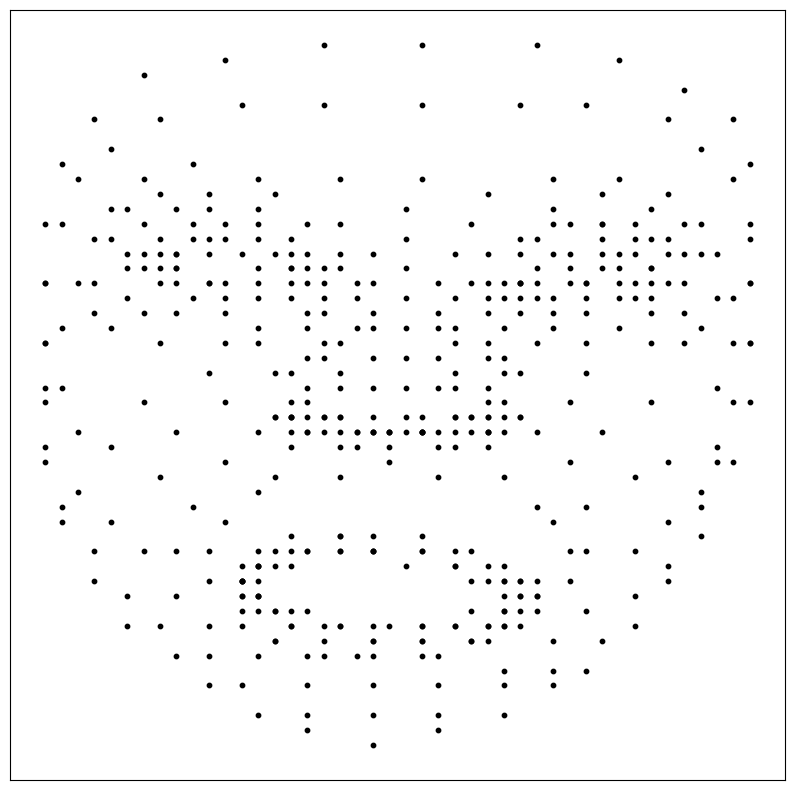

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10002.jpg


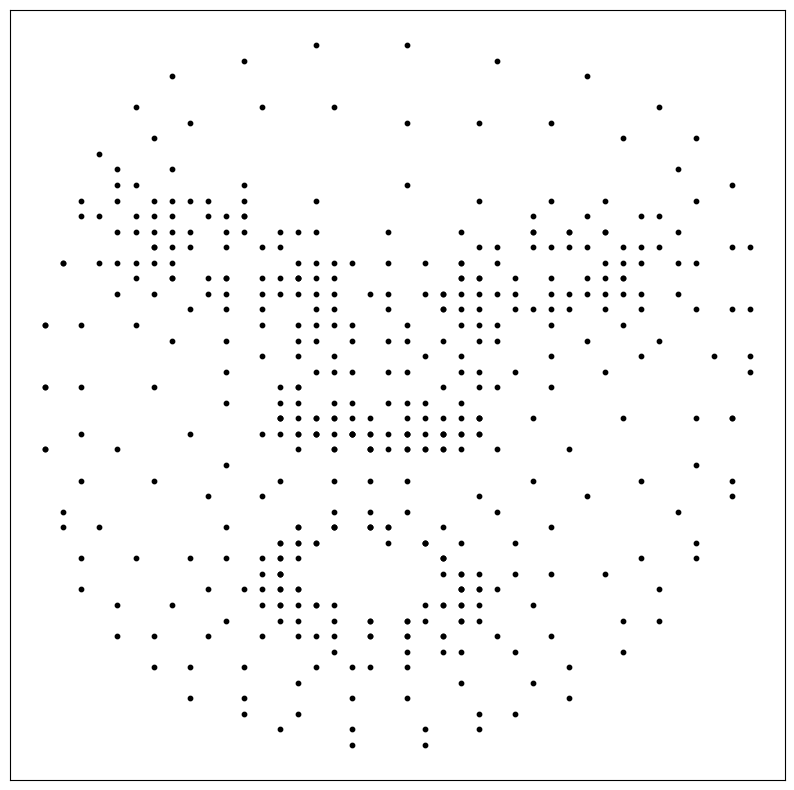

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10016.jpg


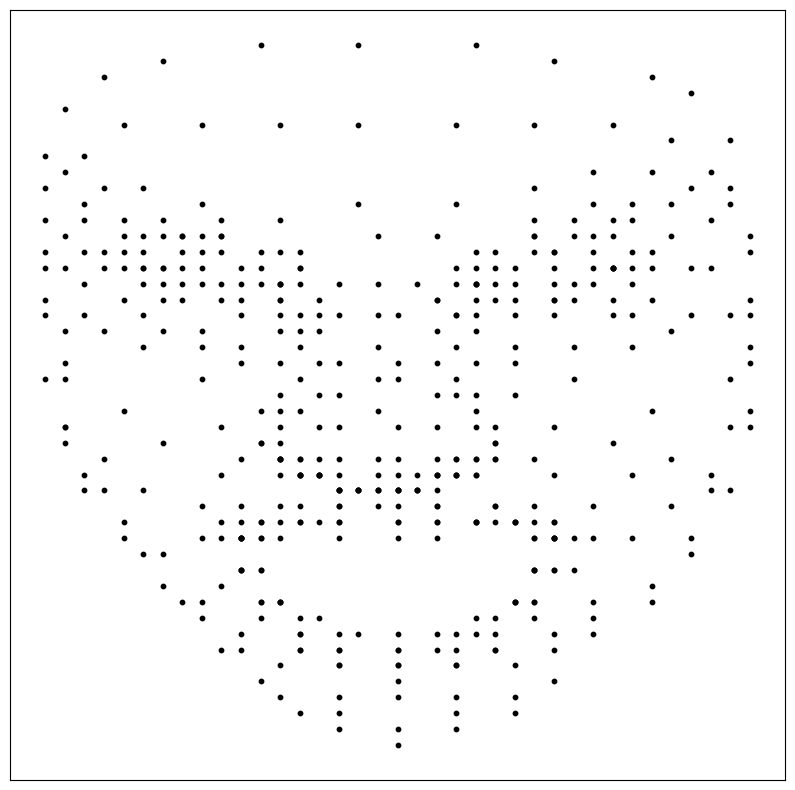

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10038.jpg


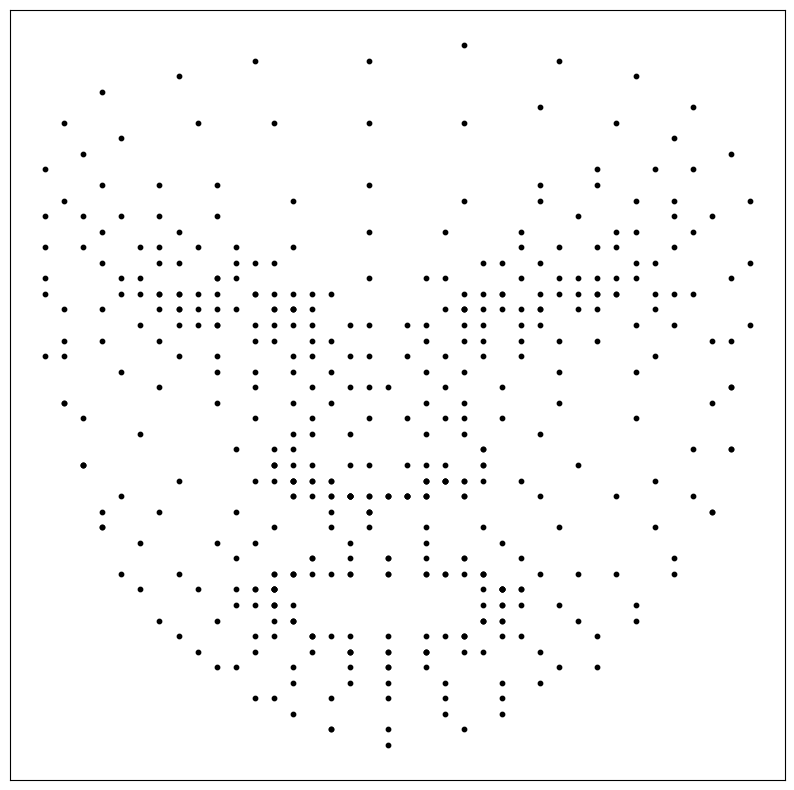

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10052.jpg


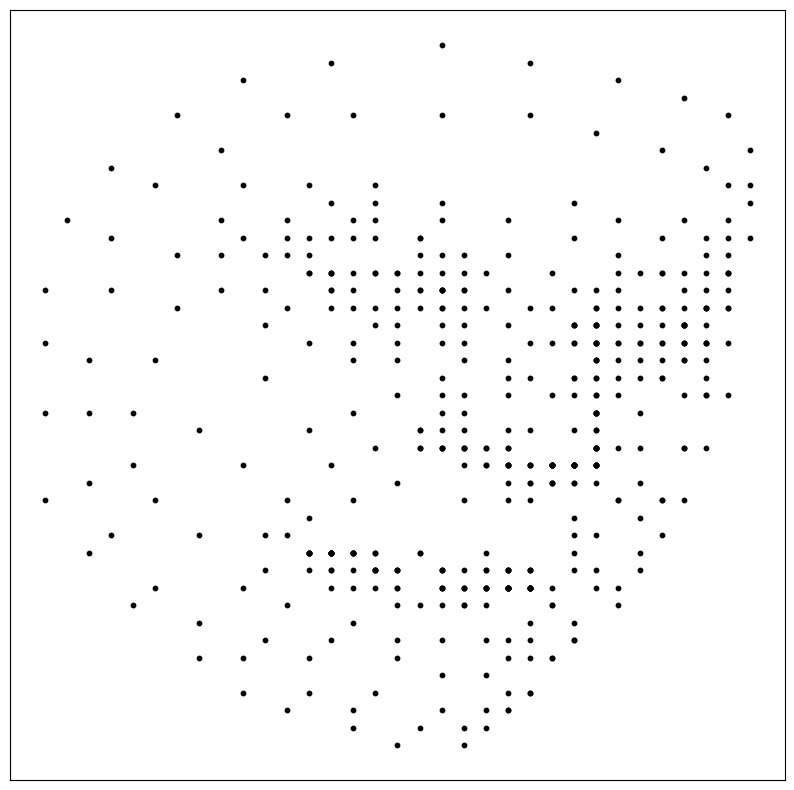

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10063.jpg


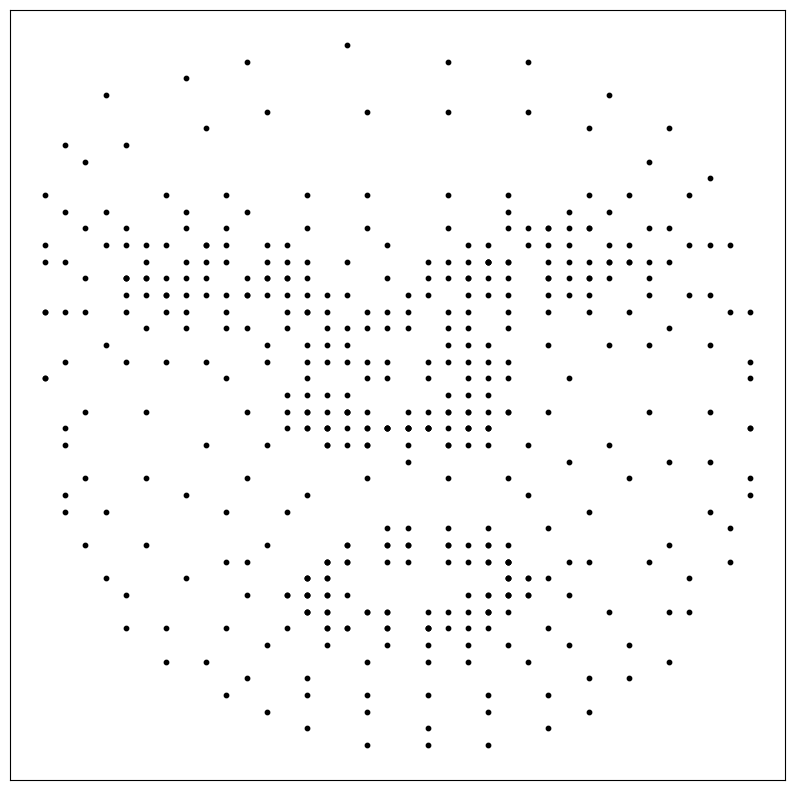

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10065.jpg


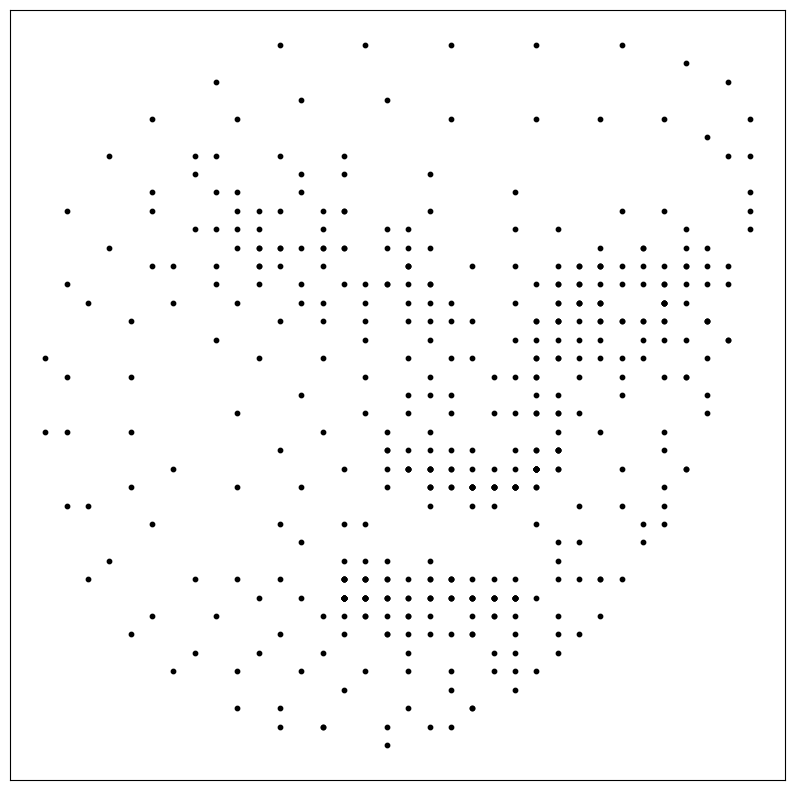

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10069.jpg


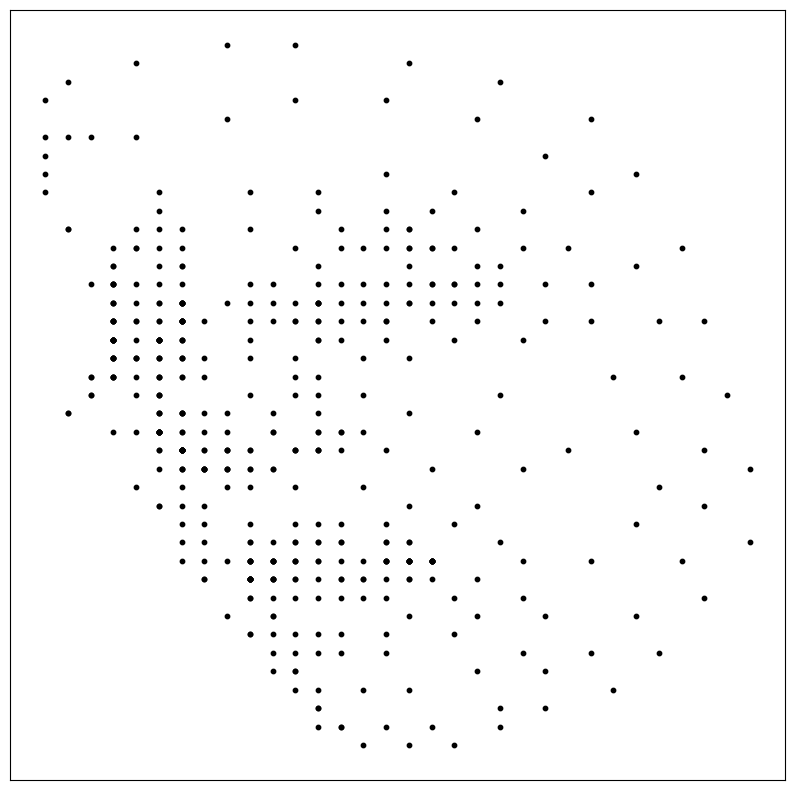

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry\10079.jpg


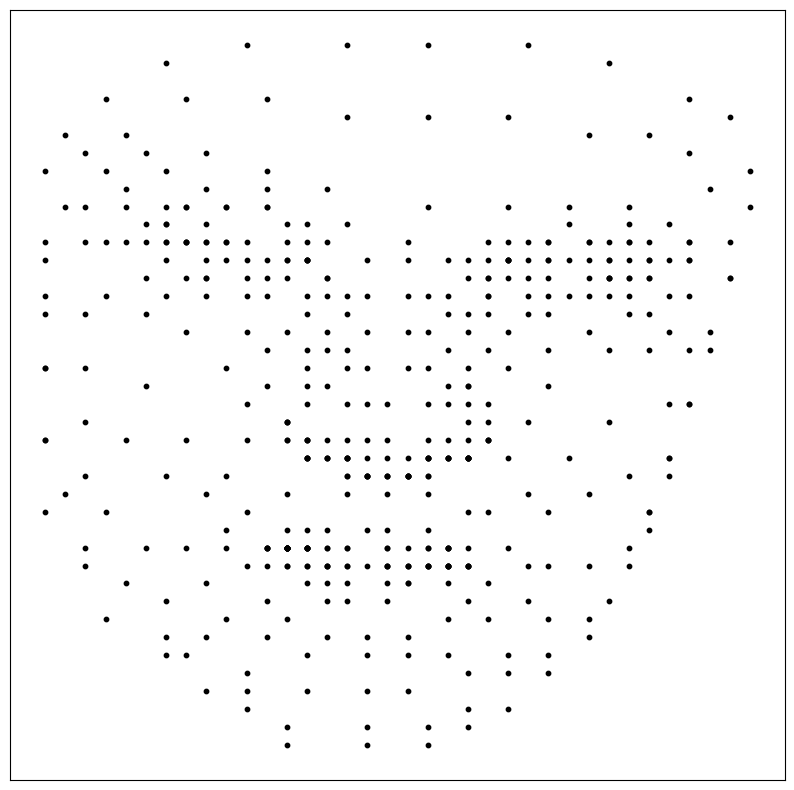

1


In [23]:
for emotion_path in path_list:
    count = 0
    p_c = 0
    print(emotion_path)
    emotion_files = os.listdir(emotion_path)
    for img in emotion_files:
        try:
            path_img = emotion_path / img
            print(path_img)
            pipeline(str(path_img), plot=True)
            if p_c == 10:
                break
            p_c += 1
        except Exception as e:
            print(e)
            count += 1
            if count == 3:
                break
    print(count)
    break

In [24]:
for emotion_path in path_list:
    count = 0
    img_count =1
    print(emotion_path)
    emotion_files = os.listdir(emotion_path)
    for img in emotion_files:
        try:
            path_img = emotion_path / img
            pipeline(str(path_img), plot=False)
            img_count += 1
        except Exception as e:
            #print(e)
            count += 1
            continue
    print('erros',count)

c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_angry
erros 564
c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_disgusted
erros 114
c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_happy
erros 904
c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_neutral
erros 639
c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_sad
erros 980
c:\Users\rodri\Documents\Rodrigo\Insper\SextoSemestre\Facial-Emotion-Classification-Graph_Fork\face_surprised
erros 272


In [25]:
# print the amount of processed images
for emotion_path in path_list:
    print(len(os.listdir(emotion_path)))

5017
1718
8996
7504
8391
4283


In [ ]:
# cria uma matriz de adjacencia para cada imagem

def save_adjacency_matrix(adjacency_matrix, filename):
    path_name = pathlib.Path(filename).parent.absolute()
    emotion = path_name.name.split('_')[1]
    path_name = path_name.parent.absolute()
    path_name = path_name.joinpath(f'{emotion}_adjacency_matrix')
    # separete the filename from the path
    filename = pathlib.Path(filename).absolute()
    # create te folder if it doesn't exist
    path_name.mkdir(parents=True, exist_ok=True)
    # save the npz file in the path_name
    file_out = path_name.joinpath(f'{filename.name}.npz')
    scipy.sparse.save_npz(file_out, adjacency_matrix)